<center>IE 7300: Statistical Learning for Engineering</center>
### <center>HW 9</center>
<center>Youyu Zhang</center>
<center>zhang.youy@northeastern.edu</center>
<center>(530)574-2826</center>
<center>Code available on: https://github.com/kuohu233/IE_7300</center>
<center>Submitted by 11/22/2022</center>

In [1]:
## imports 
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Any
from abc import ABC,abstractmethod
from sklearn.preprocessing import StandardScaler

#### Part 1
K mean with an optimum number of clusters (k)

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
y = df['Award?']
x = np.array(df.drop(['Award?'],axis=1))

In [8]:
def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

def init_centroids2(k, X):
    arr = []
    for i in range(k):
        cx_list = []
        for j in range(X.shape[1]):
            cx = np.random.uniform(min(X[:,j]), max(X[:,j]))
            cx_list.append(cx)
        arr.append(cx_list)
    return np.asarray(arr)

def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

def show_clusters(X,y, cluster, cg):
    df1 = pd.DataFrame(dict(y=y, label=cluster))
    df2 = pd.DataFrame(X)
    df = pd.concat([df1,df2], axis=1)
    # df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=cluster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if i not in np.unique(cluster):
                pass
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

def k_means(k, X, threshold, itermax):
    cg_prev = init_centroids2(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    iter = 0
    while cg_change>=threshold and iter <= itermax:
        # print(f"Iteration {iter} with cg_change={cg_change}")
        cluster = assign_cluster(k, X, cg_prev)
        # show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
        iter += 1
    print(f"Iteration {iter} with cg_change={cg_change}")
    # show_clusters(X, cluster, cg_prev)
    return cluster, cg_prev

In [9]:
group = []
centroids = []
k_range = range(2,15)
for i in k_range:
    print(f"k = {i}")
    cluster, cg_prev = k_means(k=i, X=x, 
            threshold=0.1, itermax=100)
    group.append(cluster)
    centroids.append(cg_prev)

k = 2
Iteration 23 with cg_change=0.0
k = 3
Iteration 23 with cg_change=0.0
k = 4
Iteration 50 with cg_change=0.0
k = 5
Iteration 24 with cg_change=0.0
k = 6
Iteration 59 with cg_change=0.0
k = 7


c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\youyu\AppData\Local\Temp/ipykernel_22884/119970047.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(cg_arr)


Iteration 1 with cg_change=nan
k = 8
Iteration 1 with cg_change=nan
k = 9
Iteration 1 with cg_change=nan
k = 10
Iteration 1 with cg_change=nan
k = 11
Iteration 1 with cg_change=nan
k = 12
Iteration 1 with cg_change=nan
k = 13
Iteration 1 with cg_change=nan
k = 14
Iteration 1 with cg_change=nan


In [10]:
dist_k = []
for j in range(len(group)):
    # Calculate distance between each point and its centroid
    dist_list = []
    for i in range(len(x)):
        group_ind = group[j][i]
        cent = centroids[j][group_ind]
        distance = dist(x[i], cent)
        dist_list.append(distance)
    dist_mean = np.mean(dist_list)
    dist_k.append(dist_mean)

In [15]:
centroids[4]

array([[1.16943590e+03, 3.63319265e+05, 4.49094017e+02, 3.18803419e+00,
        1.02564103e+00, 1.00000000e+00, 4.99647436e+04, 2.01111111e+01,
        1.58948718e+03, 4.73504274e+00, 5.66887179e+03],
       [1.88453484e+03, 8.28577991e+04, 1.47406335e+02, 2.68054299e+00,
        1.00904977e+00, 1.02171946e+00, 2.51761792e+04, 1.48361991e+01,
        5.80251584e+02, 1.72760181e+00, 4.38890498e+03],
       [1.55797699e+03, 1.76979146e+05, 2.68813808e+02, 3.07531381e+00,
        1.00836820e+00, 1.02928870e+00, 3.47681506e+04, 1.73284519e+01,
        8.97516736e+02, 2.43723849e+00, 4.96983054e+03],
       [2.23271598e+03, 2.31838785e+04, 9.64610304e+01, 1.46895641e+00,
        1.01805372e+00, 1.00352268e+00, 7.35145883e+03, 8.25451343e+00,
        2.35384852e+02, 7.40202554e-01, 3.69813298e+03],
       [9.07000000e+02, 7.20621217e+05, 2.47391304e+02, 3.47826087e+00,
        1.00000000e+00, 1.13043478e+00, 6.02981739e+04, 2.16086957e+01,
        1.53347826e+03, 5.52173913e+00, 6.25973913e+

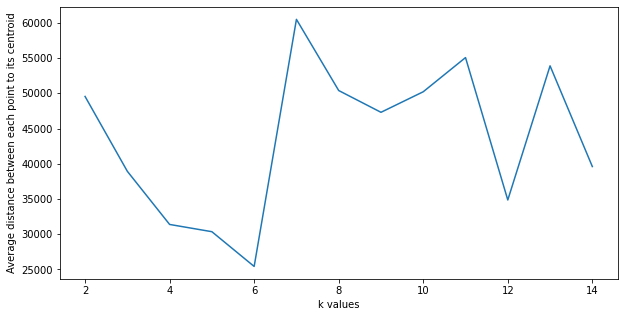

In [12]:
plt.figure(figsize=(10,5))
plt.plot(k_range,dist_k)
plt.xlabel('k values')
plt.ylabel('Average distance between each point to its centroid')
plt.show()

From the figure above we can see that k=5 and k=6 has significant lower average distance between each point to its centroids. And thus k=6 can be a better solution.

#### Part 2
Hierarchy cluster with Dendrogram

In [52]:
import math
def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()
    
    # Replace self.measure into distance function
    # def measure(self, a, b):
    #     return np.sqrt(sum(np.square(np.array(a)-np.array(b))))

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
                # distt = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                # dist = np.sqrt(np.dot(distt,distt))
                # if dist < min_dist:
                #     min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)
            print(f'Length of self.cluster.keys: {len(self.clusters.keys())}')

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))


In [77]:
# As full dataset training will exceed 20 hours, a subset sample is used to show the denogram.
# M=2 for average_link
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(x[0:400,:], 6, 2)

In [78]:
agg_hierarchical_clustering.run_algorithm()

Length of self.cluster.keys: 399
Length of self.cluster.keys: 398
Length of self.cluster.keys: 397
Length of self.cluster.keys: 396
Length of self.cluster.keys: 395
Length of self.cluster.keys: 394
Length of self.cluster.keys: 393
Length of self.cluster.keys: 392
Length of self.cluster.keys: 391
Length of self.cluster.keys: 390
Length of self.cluster.keys: 389
Length of self.cluster.keys: 388
Length of self.cluster.keys: 387
Length of self.cluster.keys: 386
Length of self.cluster.keys: 385
Length of self.cluster.keys: 384
Length of self.cluster.keys: 383
Length of self.cluster.keys: 382
Length of self.cluster.keys: 381
Length of self.cluster.keys: 380
Length of self.cluster.keys: 379
Length of self.cluster.keys: 378
Length of self.cluster.keys: 377
Length of self.cluster.keys: 376
Length of self.cluster.keys: 375
Length of self.cluster.keys: 374
Length of self.cluster.keys: 373
Length of self.cluster.keys: 372
Length of self.cluster.keys: 371
Length of self.cluster.keys: 370
Length of 

In [81]:
agg_hierarchical_clustering.print()

Cluster: 0
    [    73 252386      0      4      1      1  39787     13      0      0
   7787]
    [   138 259484   1776      1      1      1  19172     26   7172     23
   6723]
    [    69 230715      0      3      1      1  24047     12      0      0
   6826]
    [   301 238868      0      3      1      1  20521     16      0      0
   7220]
    [   158 220081      0      4      1      1  52574     21    500      1
   7626]
    [   306 217846      0      4      1      1  49198     20      0      0
   7215]
    [   130 213150      0      4      1      1  56308     41   5200     14
   7645]
    [   362 224081      0      4      1      1  40108     15    150      2
   7059]
    [   367 222227      0      4      1      1  38127     14    500      1
   7047]
    [   246 227881      0      4      1      1  41186     13      0      0
   7369]
    [   161 228829      0      5      1      1  59852     21      0      0
   7612]
    [   259 236274      0      5      1      1  61515     12     

The codes above tried to cluster 500 samples out of 4000 observations. Considering about the time complexity and the time for fitting, the total 4000 observations clustering may take over 20 hours. Thus only 500 samples are clustered. The printed result indicated over 380 observations are in the same group, and rest are in the other groups. 

The following code use scipy dendrograms to describe all 4000 observations. The outcome indicated that main 2 groups exist (yellow and green). It can also be viewed as 3 groups for 1 yellow group and 2 green groups if we divide the dendrogram from the top part. The yellow group size is obviously larger than green group, but the distances within green group are also larger than that in the yellow group. 

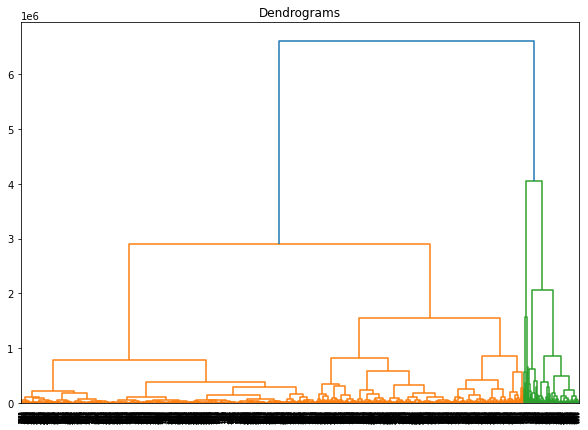

In [90]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

#### Part 3
DBScan cluster 

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

#Custom estimator for gridsearch 
class MyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self,e=0,minp=0):
        self.e =e
        self.minp=minp
        
    def fit(self, X,Y):
        self.Y=Y
        DistanceMatrix = scipy.spatial.distance.squareform(
			scipy.spatial.distance.pdist(X, 'euclidean')
			)

        core_point_array=np.zeros(150)
        cluster_array=np.zeros(150)
        PointNeighbors=[]
		
        e=self.e
        k=self.minp
        w=0
        for i in range(len(DistanceMatrix)):
            PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
            if len(PointNeighbors)>=k:
                core_point_array[i]=1
                if cluster_array[i]==0:
                    cluster_array[i]=w
                    w=w+1
                for x in range(len(PointNeighbors)):
					#print(cluster_array[PointNeighbors[x]])
                    if cluster_array[PointNeighbors[x]]==0:
                        cluster_array[PointNeighbors[x]]=cluster_array[i]

        for x in range(len(cluster_array)):
            cluster_array[x]=cluster_array[x]-1	
		
        self.cluster_array=cluster_array
        return cluster_array

    def predict(self, X):
         # Some code
         return self.cluster_array 

    def score(self, X, Y):
        dt=f1_score(self.Y,self.cluster_array,average='weighted')
        print('Accuracy -'+str(dt))
        return (dt)
        
def DBSCAN(normalised_distance,e,k):
	DistanceMatrix = scipy.spatial.distance.squareform(
		scipy.spatial.distance.pdist(normalised_distance, 'euclidean')
		)
	core_point_array=np.zeros(150)
	cluster_array=np.zeros(150)
	PointNeighbors=[]
	#e=0.3
	#k=18
	w=0
	for i in range(len(DistanceMatrix)):
		PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
		if len(PointNeighbors)>=k:
			core_point_array[i]=1
			if cluster_array[i]==0:
				cluster_array[i]=w
				w=w+1
		
			for x in range(len(PointNeighbors)):
				#print(cluster_array[PointNeighbors[x]])	
				if cluster_array[PointNeighbors[x]]==0:
					cluster_array[PointNeighbors[x]]=cluster_array[i]

	for x in range(len(cluster_array)):
			cluster_array[x]=cluster_array[x]-1	

	return cluster_array

As the maximum of the input data is limitted to 150 observations, only 150 samples are in the clustering method. 

In [109]:
# Data Transformation
input_data=x[0:150,:]
target_data=y[0:150]

poly = PolynomialFeatures(x.shape[1])
input_data=poly.fit_transform(input_data)  
input_data=QuantileTransformer(n_quantiles=40, random_state=0).fit_transform(input_data)

scaler = MinMaxScaler()
scaler.fit(input_data)
normalised_input_data=scaler.transform(input_data)
distan=pairwise_distances(normalised_input_data,metric='euclidean')
scaler.fit(distan)
normalised_distance=scaler.transform(distan)

sscaler = StandardScaler()
sscaler.fit(normalised_distance)
normalised_distance=sscaler.transform(normalised_distance)

pca = PCA(n_components=4)
normalised_distance = pca.fit_transform(normalised_distance)

scaler.fit(normalised_distance)
normalised_distance=scaler.transform(normalised_distance)

print(normalised_distance)
print('normalised_distance')

[[0.03242504 0.22853599 0.91830355 0.60398854]
 [0.0304068  0.22678839 0.91141609 0.6009346 ]
 [0.02076049 0.21547078 0.78413479 0.54567316]
 [0.0308371  0.22722787 0.91409663 0.60228907]
 [0.82512055 0.10599629 0.41713096 0.58795337]
 [0.05120071 0.24665953 0.9984805  0.64282823]
 [0.02836692 0.21519269 0.34190953 0.3998951 ]
 [0.63166211 0.01960462 0.77770667 0.02376806]
 [0.85160635 0.13728906 0.42577481 0.62379793]
 [0.80953308 0.0755992  0.42695348 0.53053593]
 [0.00988447 0.20435989 0.60260656 0.47430996]
 [0.04543761 0.22861449 0.19154728 0.37608961]
 [0.01021313 0.20335812 0.49778337 0.43725084]
 [0.0125267  0.20840973 0.73058005 0.52188798]
 [0.04967352 0.24549244 0.99899243 0.64302716]
 [0.02297106 0.21186896 0.35016667 0.40152667]
 [0.02436302 0.21310503 0.27777137 0.37970863]
 [0.01701058 0.21314205 0.789012   0.54802037]
 [0.01434843 0.20608872 0.29150032 0.37159794]
 [0.0085804  0.20356964 0.59340805 0.47215976]
 [0.7992833  0.09049183 0.31838748 0.63846855]
 [0.93693096 

In [110]:
eps_values= np.arange(0.1,0.5 ,0.001)
min_sample_values = np.arange(2,30,1)

params = {
    'e':eps_values,
    'minp':min_sample_values
}
cv = [(slice(None), slice(None))]

In [111]:
gs = GridSearchCV(MyClassifier(), param_grid=params, cv=cv)
Y=target_data
gs.fit(normalised_distance,Y)

Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.2579045792375929
Accuracy -0.3323657435482784
Accuracy -0.3323657435482784
Accuracy -0.3241291551835596
Accuracy -0.3241291551835596
Accuracy -0.3241291551835596
Accuracy -0.3255945017182131
Accuracy -0.30355194852672374
Accuracy -0.30355194852672374
Accuracy -0.2974698911263128
Accuracy -0.18593272171253825
Accuracy -0.18593272171253825
Accuracy -0.17207547169811324
Accuracy -0.1737142857142857
Accuracy -0.1737142857142857
Accuracy -0.16564102564102562
Accuracy -0.16564102564102562
Accuracy -0.0
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accuracy -0.18934053346424481
Accura

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=MyClassifier(),
             param_grid={'e': array([0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128, 0.129, 0.13 , 0.131, 0.132, 0.133, 0.134, 0.135,
       0.136, 0.137, 0.138, 0.139, 0.1...
       0.451, 0.452, 0.453, 0.454, 0.455, 0.456, 0.457, 0.458, 0.459,
       0.46 , 0.461, 0.462, 0.463, 0.464, 0.465, 0.466, 0.467, 0.468,
       0.469, 0.47 , 0.471, 0.472, 0.473, 0.474, 0.475, 0.476, 0.477,
       0.478, 0.479, 0.48 , 0.481, 0.482, 0.483, 0.484, 0.485, 0.486,
       0.487, 0.488, 0.489, 0.49 , 0.491, 0.492, 0.493, 0.494, 0.495,
       0.496, 0.497, 0.498, 0.499]),
                         'minp': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 2

In [112]:
print(gs.best_params_)
para=gs.best_params_

{'e': 0.4660000000000003, 'minp': 24}


The outcome of best estimation for MyClassifier e is 0.46, and the minimum p is 24. 

0      0
1      0
2      0
3      0
4      1
      ..
145    1
146    0
147    1
148    0
149    0
Name: Award?, Length: 150, dtype: int64
[ 0  0  0  0  1  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1 -1  1  1
 -1  0  1  0  1  1  0  0  0  0  0  1  1  1  0  0  1  0  1  0  0 -1  0  1
  1  1  1  0  0  1  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0  0 -1  0
  1  1  0  0  0  0  0  1  0  1  0  0  0  1  0  1  1  1  1  1  0  1  1  0
  0  0  0  0  0  0  0  1  0  1 -1  0  1  1  0  1  1  0  1  0  0  1  0  0
  0  1  1  0  0 -1  1  1  0  0  0  1  0  1  0 -1  0  1  0  0  0  0  1  0
  0  1  0  1  0  0]
precision_score- 0.6858588399720474
recall_score- 0.6466666666666666


c:\Users\youyu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


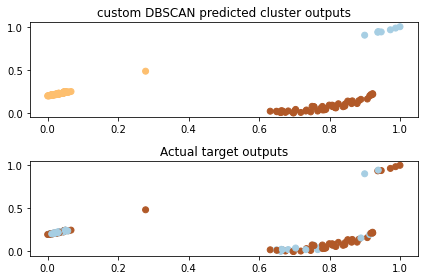

In [113]:
e=para['e']
k=para['minp']
cluster_array=DBSCAN(normalised_distance,e,k)

print(target_data)
print(cluster_array.astype(int))

print('precision_score- '+str(precision_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))
print('recall_score- '+str(recall_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))

plt.subplot(2, 1, 1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=cluster_array, cmap='Paired')
plt.title("custom DBSCAN predicted cluster outputs")

plt.subplot(2, 1, 2)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=target_data, cmap='Paired')
plt.title("Actual target outputs")

plt.tight_layout()
plt.show()


The prediction output group number doesn't match with the actual target outoupt. It misclassified the left corner group observations. This could happen because of the wrongly normalized data. The original data did not get properly processed with correct grouping methods. 

The overall precision score is 0.686 and recall score is 0.647, which is moderate.

#### Part 4
Draw the inferences from the clusters obtained.

Draw the inferences based on each feature, no obvious inferences are observed based on the plots.

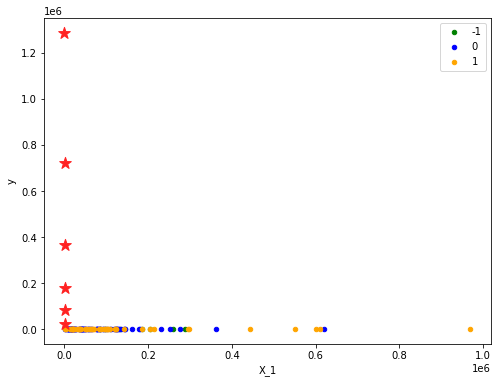

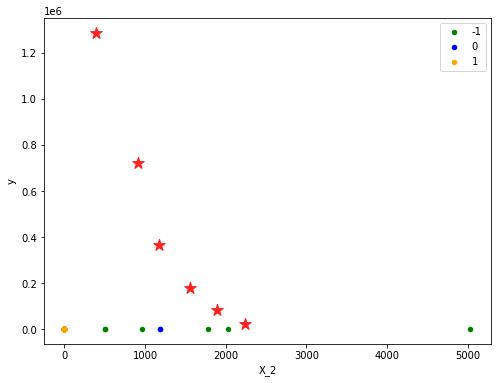

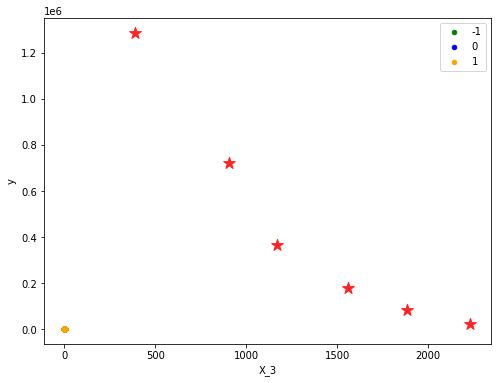

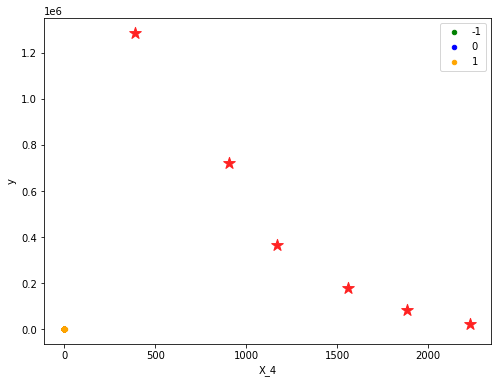

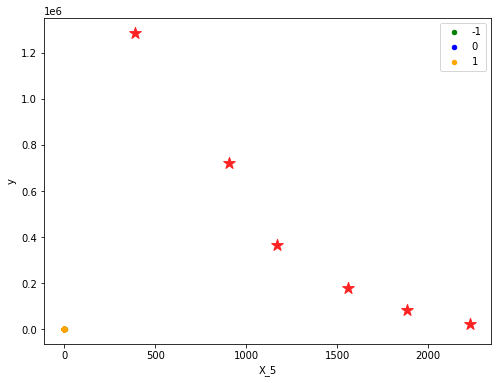

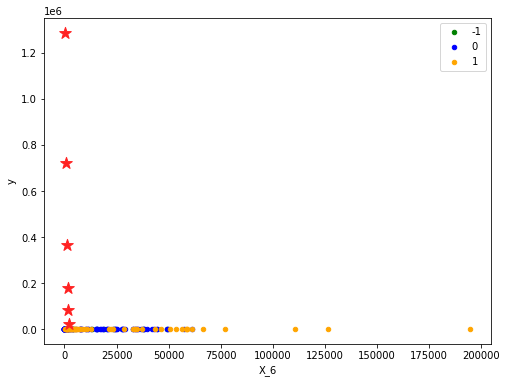

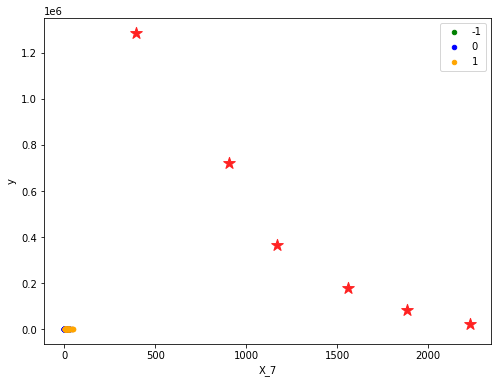

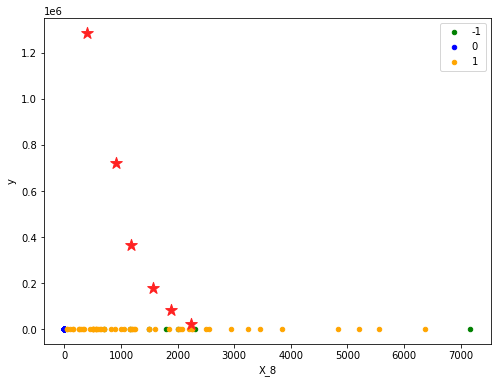

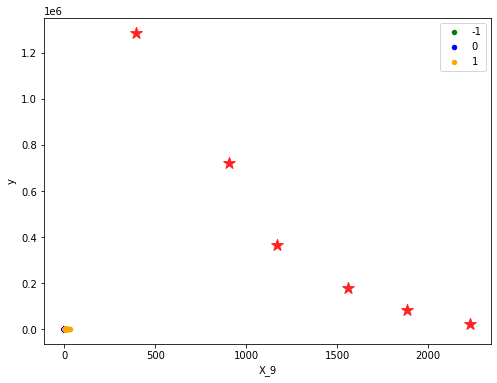

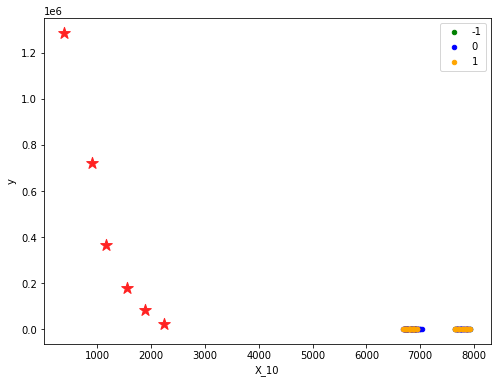

In [190]:
X = x[0:150]
cluster = cluster_array.astype(int)
cg = centroids[4][0:150]
df1 = pd.DataFrame(dict(y=y[0:150], label=cluster))
df2 = pd.DataFrame(X)
df = pd.concat([df1,df2], axis=1)
colors = {0:'blue', 1:'orange', -1:'green', 3:'black', 4:'red', 5:'pink', 6:'purple'}

for i in range(1,X.shape[1]):
    fig, ax = plt.subplots(figsize=(8,6))
    df['a'] = X[:,i]
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='a', y='y', label=key, color=colors[key])
    ax.scatter(cg[:, 0], cg[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel(f'X_{i}')
    plt.ylabel('y')
    plt.show()